In this section we are going to work with Biophyton, specifically accessing KEGG to study the pathway hsa04110:                 https://www.genome.jp/dbget-bin/www_bget?pathway+hsa04110

Note: It is important to have biphyton installed first.

In [1]:
from Bio.KEGG import REST

In [3]:
pathway_hsa04110 = REST.kegg_get("hsa04110").read()

In [5]:
type(pathway_hsa04110)

str

In [9]:
pathway_hsa04110[0:400]

'ENTRY       hsa04110                    Pathway\nNAME        Cell cycle - Homo sapiens (human)\nDESCRIPTION Mitotic cell cycle progression is accomplished through a reproducible sequence of events, DNA replication (S phase) and mitosis (M phase) separated temporally by gaps known as G1 and G2 phases. Cyclin-dependent kinases (CDKs) are key regulatory enzymes, each consisting of a catalytic CDK subun'

In [11]:
len(pathway_hsa04110)

23929

In [13]:
for line in pathway_hsa04110.split("\n"): 
    print(line)

ENTRY       hsa04110                    Pathway
NAME        Cell cycle - Homo sapiens (human)
DESCRIPTION Mitotic cell cycle progression is accomplished through a reproducible sequence of events, DNA replication (S phase) and mitosis (M phase) separated temporally by gaps known as G1 and G2 phases. Cyclin-dependent kinases (CDKs) are key regulatory enzymes, each consisting of a catalytic CDK subunit and an activating cyclin subunit. CDKs regulate the cell's progression through the phases of the cell cycle by modulating the activity of key substrates. Downstream targets of CDKs include transcription factor E2F and its regulator Rb. Precise activation and inactivation of CDKs at specific points in the cell cycle are required for orderly cell division. Cyclin-CDK inhibitors (CKIs), such as p16Ink4a, p15Ink4b, p27Kip1, and p21Cip1, are involved in the negative regulation of CDK activities, thus providing a pathway through which the cell cycle is negatively regulated.
             Eukaryoti

Extraction of the list of genes involved in the hsa04110 pathway

In [51]:
pathway_genes = REST.kegg_link("hsa", "pathway:hsa04110").read()
print(pathway_genes)

path:hsa04110	hsa:1017
path:hsa04110	hsa:1019
path:hsa04110	hsa:1021
path:hsa04110	hsa:1022
path:hsa04110	hsa:1026
path:hsa04110	hsa:1027
path:hsa04110	hsa:10274
path:hsa04110	hsa:1028
path:hsa04110	hsa:1029
path:hsa04110	hsa:1030
path:hsa04110	hsa:1031
path:hsa04110	hsa:1032
path:hsa04110	hsa:10393
path:hsa04110	hsa:10403
path:hsa04110	hsa:10459
path:hsa04110	hsa:10735
path:hsa04110	hsa:10744
path:hsa04110	hsa:10912
path:hsa04110	hsa:10926
path:hsa04110	hsa:10971
path:hsa04110	hsa:1111
path:hsa04110	hsa:11200
path:hsa04110	hsa:113130
path:hsa04110	hsa:114799
path:hsa04110	hsa:119504
path:hsa04110	hsa:1387
path:hsa04110	hsa:151648
path:hsa04110	hsa:157570
path:hsa04110	hsa:1647
path:hsa04110	hsa:1663
path:hsa04110	hsa:168448
path:hsa04110	hsa:1869
path:hsa04110	hsa:1870
path:hsa04110	hsa:1871
path:hsa04110	hsa:1874
path:hsa04110	hsa:1875
path:hsa04110	hsa:2033
path:hsa04110	hsa:23047
path:hsa04110	hsa:23063
path:hsa04110	hsa:23244
path:hsa04110	hsa:23383
path:hsa04110	hsa:23594
path:hs

In [ ]:
We save the contents of the pathway in a txt file:

In [17]:
with open("pathway_hsa04110.txt", "w") as f:
    f.write(pathway_hsa04110)

print("File saved as pathway_hsa04110.txt")

File saved as pathway_hsa04110.txt


Let's search for the terms Cyclin, CDK, MCM, ORC, and CDC45 in the hsa04110 pathway and count how many times each appears. Then, we plot a bar chart using the matplotlib library.

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
search_terms = ['Cyclin', 'CDK', 'MCM', 'ORC', 'CDC45']
term_frequency= {}
for term in search_terms:
    count = pathway_hsa04110.lower().count(term.lower()) 
    term_frequency[term] = count  
    print(f"The term '{term}' appears {count} time(s) in the pathway.")

The term 'Cyclin' appears 32 time(s) in the pathway.
The term 'CDK' appears 22 time(s) in the pathway.
The term 'MCM' appears 7 time(s) in the pathway.
The term 'ORC' appears 6 time(s) in the pathway.
The term 'CDC45' appears 1 time(s) in the pathway.


Convert the dictionary to a data frame

In [43]:
df = pd.DataFrame(list(term_frequency.items()), columns=['Term', 'Count'])

Barplot:

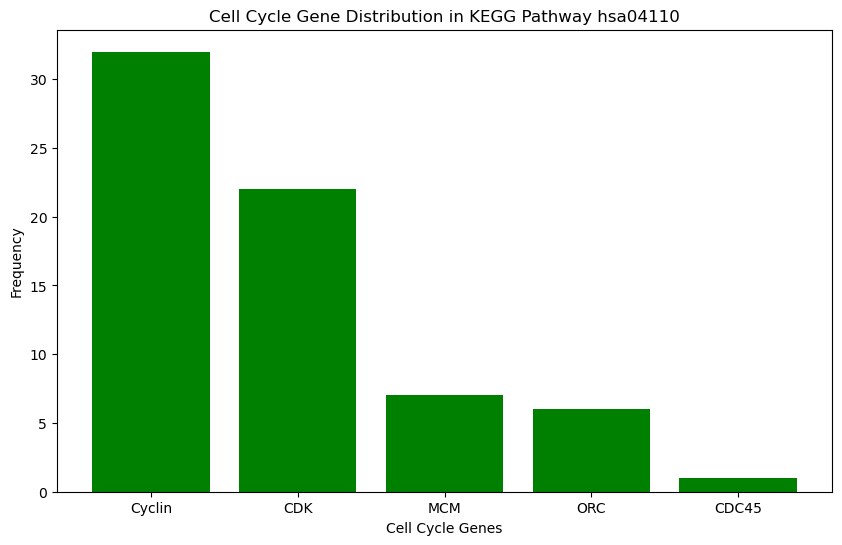

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Term'], df['Count'], color='green')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Cell Cycle  Distribution of terms in KEGG Pathway hsa04110')
plt.show()